------------------------------------------------------------------------------------------------------------------------------
<img align="right" src="https://upload.wikimedia.org/wikipedia/commons/c/c8/Iteso_logo.jpg" width="100" height="100"> 

# <font color='#797983'> **Laboratorio de Modelado de Datos | Primavera 2023.**
### <font color='#1A2478'> **Instituto Tecnológico y de Estudios Superiores de Occidente**.

**<font color='#797983'>Nombre:**  Flores Reyes Ilse Regina 
    
**<font color='#797983'>Expediente:** 742641.
    
**<font color='#797983'>Profesor:** Sara Eugenia Rodriguez Reyes.
  
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://dezyre.gumlet.io/images/Types+of+Regression+Analysis+in+Machine+Learning/Regression+Analysis.png?w=330&dpr=2.6" width="350px" height="180px" />

# <font color= #8A0829> Proyecto Taller de Modelado de Datos </font>
### <font color='#797983'> **Proyecto Final. Análisis de Regresion y Clasificación.**
 
- <Strong> Fecha </Strong>: 26 Marzo
- <Strong> Año </Strong>: 2023

 
<p style="text-align:left;"> Imagen recuperada de: https://dezyre.gumlet.io/images/Types+of+Regression+Analysis+in+Machine+Learning/Regression+Analysis.png?w=330&dpr=2.6</p>


- <Strong> `Ilse Regina Flores Reyes` </Strong>
- <Strong> Email: </Strong> ilse.flores@iteso.mx <font color="blue"> </font>

### OBJETIVO: 

El objetivo del proyecto es evaluar el conocimiento adquirido de regresión lineal/logística, redes neuronales, máquinas de vector soporte y modelos basados en árboles tanto para problemas de regresión como de clasificación. 

### Regresión

El objetivo de esta aplicación de proyecto se puede separar en las siguientes fases:

1. **Definición del problema**. El estudiante debe definir un problema a ser resuelto, basado en la selección de un conjunto de datos de un problema que sea de su interés. Es importante que los datos seleccionados correspondan a un problema de regresión de forma que cumpla con el objetivo de la sección de este proyecto. Si la selección de los datos es complicada, como sugerencia pueden tomar el que sea de su interés de las siguientes páginas:

http://archive.ics.uci.edu/ml/

https://www.kdnuggets.com/datasets/index.html

https://www.kaggle.com/datasets

https://data.world/

2. **Preparación de datos:** Limpieza y extracción de información estadística básica en los datos analizados. En esta fase las características de las bases de datos deben ser mencionadas (datos nulos, datos sesgados, datos atípicos, datos imbalanceados, distribución de datos, etc.), así como el proceso y decisiones tomadas para procesar y limpiar estos datos.  Incluir gráficos que muestren el comportamiento de los datos y explicar lo que se observa en el gráfico. 

3. **Procesar modelo de regresión:** Aplicar al menos 4 modelos de regresión para estimar el mapeo de los datos. La intención principal es hacer una comparación del performance de cada modelo, incluyendo la mención de la complejidad (número de parámetros y tiempo de ejecución). Añadir un método de ajuste de hiperparámetros (gridsearch) para mejorar el performance del modelo. Crear un conjunto de datos "nuevos" donde se prediga la variable objetivo para esos nuevos datos. 

4. **Discusión de los resultados:** Basado en los resultados de la comparación y performance de los modelos, generar una sección de conclusiones donde se hable de las ventajas y desventajas de los modelos propuestos. 

1. **Definición del problema**.

- Estos datos se descargaron del sitio web de Hass Avocado Board USA en mayo de 2018 y se compilaron en un solo CSV. Así es como la Junta del Aguacate Hass describe los datos en su sitio web :

**La siguiente tabla representa los datos de escaneo minorista semanales de    2018 para el volumen minorista nacional (unidades) y el precio. Los datos de  escaneo minorista provienen directamente de las cajas registradoras de los minoristas en función de las ventas minoristas reales de aguacates Hass. A partir de 2013, la siguiente tabla refleja un conjunto ampliado de datos minoristas de múltiples puntos de venta. Los informes de múltiples puntos de venta incluyen una agregación de los siguientes canales: supermercado, masa, club, drogas, dólar y militar. El precio promedio (de los aguacates) en la tabla refleja un costo por unidad (por aguacate), incluso cuando se venden varias unidades (aguacates) en bolsas. Los códigos de búsqueda de productos (PLU) en la tabla son solo para aguacates Hass. No se incluyen en esta tabla otras variedades de aguacates (p. ej., piel verde).**

- Columnas Relevantes en el conjunto de datos:
* Date- La fecha de la observación.
* AveragePrice- el precio promedio de un solo aguacate
* type- convencional u orgánico
* year- el año
* Region- la ciudad o región de la observación
* Total Volume- Número total de aguacates vendidos
* 4046- Número total de aguacates con PLU 4046 vendidos
* 4225- Número total de aguacates con PLU 4225 vendidos
* 4770- Número total de aguacates con PLU 4770 vendidos

Se busca predecir el precio promedio de un solo aguacate. Nuestra variable a predecir es 'AveragePrice'.

Kiggins, J. (2018). Avocado Prices. Kaggle.com. https://www.kaggle.com/datasets/neuromusic/avocado-prices?resource=download



2. **Preparación de datos:**

In [1]:
#Librerías
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import os
import graphviz
from sklearn.model_selection import train_test_split, KFold, cross_val_score
#Selección de variables
from sklearn.feature_selection import RFE

#regresión lineal
from sklearn.linear_model import LinearRegression
#métricas de performance
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error, r2_score
#Ridge
from sklearn.linear_model import Ridge
import time
#Grid Search
from sklearn.model_selection import GridSearchCV
#árbol de decisión
from sklearn.tree import DecisionTreeRegressor
#Redes Neuronales
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD, Adam

In [2]:
#cargar datos
datos = pd.read_csv('avocado.csv')
datos.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Exploración de los datos

In [3]:
datos.shape

(18249, 14)

In [5]:
#Visualizar todo junto
def reporte(datos):
    dtyp = pd.DataFrame(datos.dtypes, columns=['Tipo'])
    missing = pd.DataFrame(datos.isnull().sum(), columns=['Valores_Nulos'])
    unival = pd.DataFrame(datos.nunique(), columns=['Valores_Unicos'])
    maximo = pd.DataFrame(datos.max(), columns=['Max'])
    minimo = pd.DataFrame(datos.min(), columns=['Min'])
    return dtyp.join(missing).join(unival).join(maximo).join(minimo)
reporte(datos)

,Tipo,Valores_Nulos,Valores_Unicos,Max,Min
Unnamed: 0,int64,0,53,52,0
Date,object,0,169,2018-03-25,2015-01-04
AveragePrice,float64,0,259,3.25,0.44
Total Volume,float64,0,18237,62505646.52,84.56
4046,float64,0,17702,22743616.17,0.0
4225,float64,0,18103,20470572.61,0.0
4770,float64,0,12071,2546439.11,0.0
Total Bags,float64,0,18097,19373134.37,0.0
Small Bags,float64,0,17321,13384586.8,0.0
Large Bags,float64,0,15082,5719096.61,0.0


- No hay valores Nulos
- Date no la incuiremos en el modelo
- Year no la incluiremos en nuestrio modelo
- Type al tener dos clases podremos aplicarle un label encoder
- Quitamos unnamed ya que no aporta información al ser solo un index.
- Región tampoco la incluiremos en nuestro modelo.



In [6]:
datos=datos.drop(['Unnamed: 0','Date','year','region'], axis=1)


18249 filas y 14 columnas

In [7]:
datos.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional


Le aplicaremos un label encoder a nuestra variable 'Type'

In [8]:
from sklearn.preprocessing import OrdinalEncoder
datanew=datos.copy()
ord_enc = OrdinalEncoder()
datanew['type_encoder'] = ord_enc.fit_transform(datanew[['type']])
datanew[['type', 'type_encoder']]

,type,type_encoder
0,conventional,0.0
1,conventional,0.0
2,conventional,0.0
3,conventional,0.0
4,conventional,0.0
...,...,...
18244,organic,1.0
18245,organic,1.0
18246,organic,1.0
18247,organic,1.0


- 0: conventional
- 1: organic

In [9]:
datanew.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,type_encoder
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,0.0


In [10]:
datanew=datanew.drop(['type'], axis=1)
datanew.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type_encoder
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0


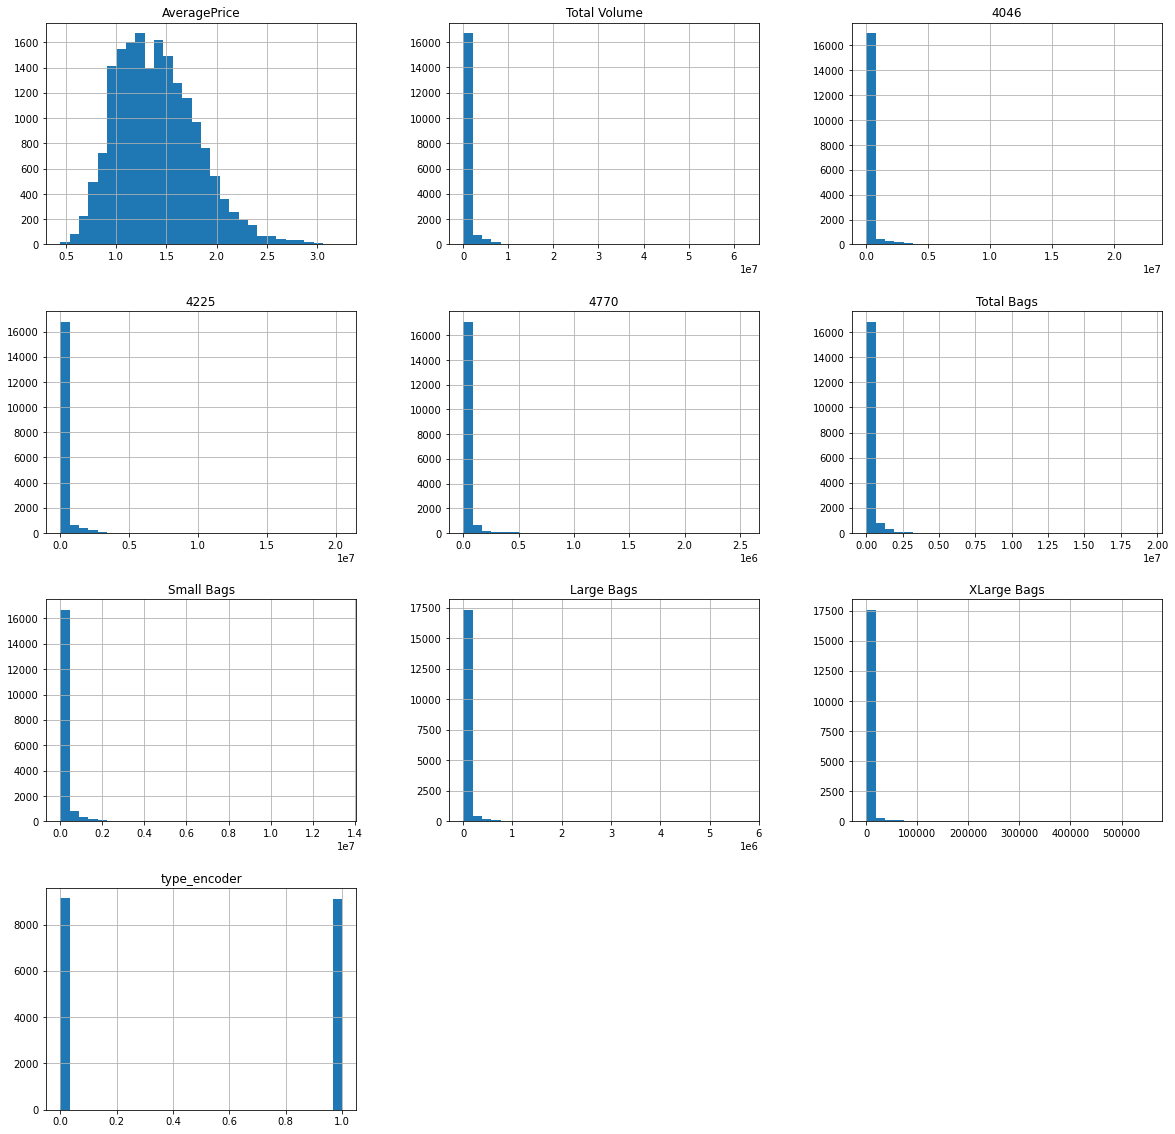

In [11]:
#Histogramas
datanew.hist(bins=30,figsize=(20,20))
plt.show()

In [12]:
# Calculo de la asimetria con pandas
skewness = round(datanew.skew(),2)
skewness = skewness.to_frame()
skewness = skewness.rename(columns={0: "value"}) 

def f(x):
    if x['value'] < -1 or x['value'] > 1: return 'Highly Skewed'
    elif (x['value']<=0 and x['value']>=-0.5) or (x['value'] >=0 and x['value']<=0.5):
        return 'Symmetric distribution'
    else: return 'Moderately skewed'
    
skewness['skewness'] = skewness.apply(f, axis=1)

skewness

,value,skewness
AveragePrice,0.58,Moderately skewed
Total Volume,9.01,Highly Skewed
4046,8.65,Highly Skewed
4225,8.94,Highly Skewed
4770,10.16,Highly Skewed
Total Bags,9.76,Highly Skewed
Small Bags,9.54,Highly Skewed
Large Bags,9.80,Highly Skewed
XLarge Bags,13.14,Highly Skewed
type_encoder,0.00,Symmetric distribution


Aquí vemos que todas mis variables excepto 'type_encoder' están sesgadas, 'AveragePrice' está moderadamente sesgada, veremos los outliers. Type_encoder es simétrica.

### Outliers

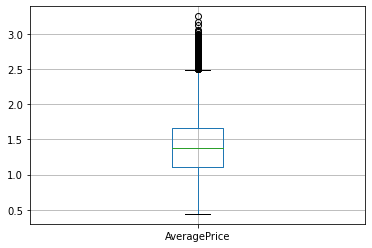

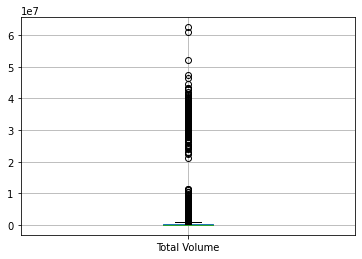

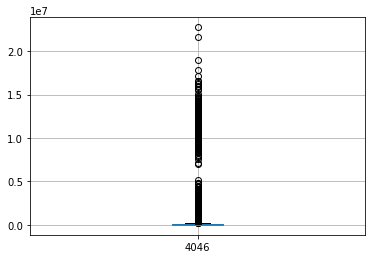

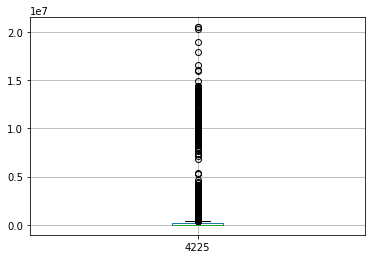

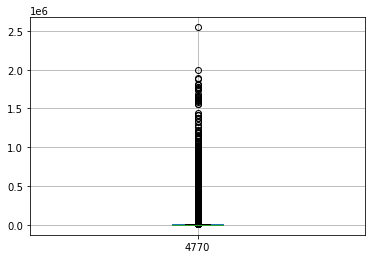

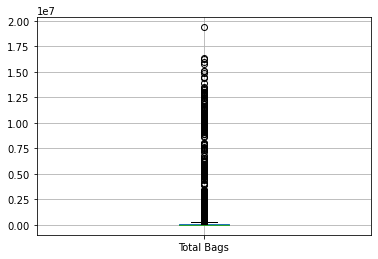

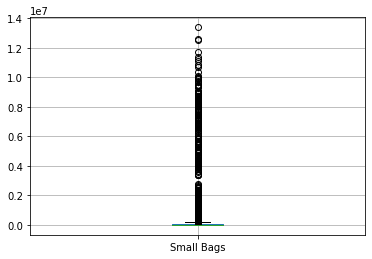

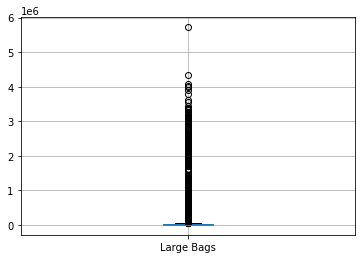

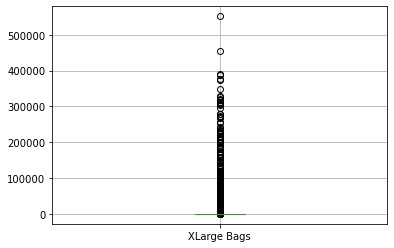

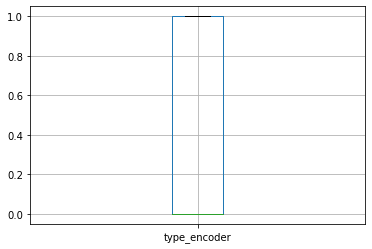

In [13]:
for column in datanew.columns:
    datanew[[column]].boxplot()
    plt.show()


Todas mis columnas cuentan con datos atipicos menos mi variable type_encoder y mi variable AveragePrice un poco menos que los demás. Veremos el numero de outliers de mis variables para ver si vale la pena realizar una transformación.

Podemos ver que no hay gran numero de datos atípicos que puedan afectar nuestro modelo si los quitamos, por lo que no realizaré ninguna transformación y los quitaré.

In [14]:
for col in datanew.columns:
    if col :
        q1 = datanew[col].quantile(0.25)
        q3 = datanew[col].quantile(0.75)
        iqr = q3 - q1

        # Calculamos los límites inferior y superior de la regla de Tukey
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        # Identificamos los valores atípicos
        outliers = (datanew[col] < lower) | (datanew[col] > upper)

        # Eliminamos los valores atípicos del conjunto de datos original
        datanew_clean = datanew[~outliers]

        # Mostramos el número de valores atípicos encontrados y eliminados para cada variable
        n_outliers = outliers.sum()
        n_cleaned = len(datanew) - len(datanew_clean)
        print("Número de valores atípicos encontrados en", col, ":", n_outliers)
        print("Número de valores eliminados en", col, ":", n_cleaned)

Número de valores atípicos encontrados en AveragePrice : 209
Número de valores eliminados en AveragePrice : 209
Número de valores atípicos encontrados en Total Volume : 2297
Número de valores eliminados en Total Volume : 2297
Número de valores atípicos encontrados en 4046 : 2518
Número de valores eliminados en 4046 : 2518
Número de valores atípicos encontrados en 4225 : 2519
Número de valores eliminados en 4225 : 2519
Número de valores atípicos encontrados en 4770 : 2918
Número de valores eliminados en 4770 : 2918
Número de valores atípicos encontrados en Total Bags : 2533
Número de valores eliminados en Total Bags : 2533
Número de valores atípicos encontrados en Small Bags : 2407
Número de valores eliminados en Small Bags : 2407
Número de valores atípicos encontrados en Large Bags : 2707
Número de valores eliminados en Large Bags : 2707
Número de valores atípicos encontrados en XLarge Bags : 4014
Número de valores eliminados en XLarge Bags : 4014
Número de valores atípicos encontrados

Aquí eliminamos nuestros outliers.

Ahora dividiremos en 'x' y 'y' nuestras variables

In [14]:
#Separamos las X y las Y
X = datanew.iloc[:, 1:]
Y = datanew['AveragePrice']

In [15]:
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type_encoder
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0
...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0


In [16]:
Y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

Dividimos los datos en test y train

In [17]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2, random_state=42)

Escalamos los datos

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

## PARTE 2

- Configuramos los folds que vamos a usar para todos los modelos
- Usaremos el error cuadrático medio como medida de performance

In [19]:

n_folds = 5
seed = 7
scoring = 'neg_mean_squared_error' #<-
kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)

## Modelo1: Regresión lineal 
La regresión es una técnica de aprendizaje supervisado que busca encontrar relación entre variables. 
Un problema de regresión es cuando la variable de salida es discreta o continuar. 

In [20]:
#Cross validation y train-test split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
#Inicializar modelo
lm=LinearRegression()

#Hacer el cross validation y probar con el train
r2_lr= (cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_lr= -(cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_lr= (-cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_lr)
print("MAE Train", mae_lr)
print("MSE Train", mse_lr)

R2 train 0.40171019470735236
MAE Train 0.23845374992505008
MSE Train 0.09718652969115563


- Se inicializó el modelo y se realizó en el cross validation probándolo en mi train y test evaliando el performance de cada uno.
- Este es el performance del train.




In [21]:
#Performance en el test
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

mae_lr=mean_absolute_error(y_test,y_pred)
mse_lr=mean_squared_error(y_test,y_pred)
r2_lr=r2_score(y_test,y_pred)

results_lr = pd.DataFrame([['Linear regression', mae_lr,mse_lr,r2_lr]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_lr

,Model,MAE,MSE,R2
0,Linear regression,0.244023,0.099607,0.380048


- Este es mi performance del test
- Mi R^2 está muy baja en mi train y test, en cambio mi MAE y MSE apárentemente muy bajos y nos dice que mi modelo esta prediciendo bien pero falta comparar los resultados con los otros modelos.
#### Ventajas de la regresión lineal
- Flexible a una variedad de relaciones entre variables
- Grenera líneas de tendencia
- No es un modelo tardado
#### desventajas de la regresión lineal
- Sensibilidad a datos atípicos
- problemas de extrapolación
- Limitaciones en la relación causal


## Modelo 2: Random Forest

Para este modelo vamos a usar cross validation + grid search para encontrar los siguientes hiperparámetros óptimos:
- max_depth (profundidad)
- min_samples_split (número mínimo de observaciones por split)
- n_estimators (número de árboles)

In [22]:
from sklearn.ensemble import RandomForestRegressor

#Inicializo modelo
model = RandomForestRegressor(min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)

#Grid search para optimizar hiperparámetros
gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11), #profundidad del árbol
                                'min_samples_split': range(10, 60, 10), #mínimo numero de observaciones
                                'n_estimators': [1,100,10] #número de árboles
                                }, 
                  cv=kfold,
                  scoring='neg_mean_squared_error',
                  verbose=0)
#entreno el modelo
gs.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=RandomForestRegressor(min_samples_leaf=2,
                                             random_state=0),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': range(10, 60, 10),
                         'n_estimators': [1, 100, 10]},
             scoring='neg_mean_squared_error')

Aquí inicializamos el modelo, realizamos grid search para obtener los hiperparámetros para tener un buen modelo.

In [23]:
#¿cuáles son los hiperparámetros óptimos?
print(gs.best_params_)

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


Nuestros hiperparámetros óptimos son:
- max_depth=10
- min_samples_split=10
- n_estimators=100

Ahora crearemos el modelo con estos hiperparámetros.

In [24]:
#crear nuevo modelo usando los parámetros óptimos que obtuvimos
new_model_RF = RandomForestRegressor(n_estimators=100,#número de árboles
                               criterion='squared_error',
                               max_depth=10,
                               min_samples_split=10,
                               min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)

#Entreno modelo optimizado
new_model_RF.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_rf= (cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_rf= -(cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_rf= (-cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_rf)
print("MAE Train", mae_rf)
print("MSE Train", mse_rf)

R2 train 0.7142620414872287
MAE Train 0.15612279036949944
MSE Train 0.046413009528425836


In [25]:
#Performance en el test
y_pred = new_model_RF.predict(X_test)

mae_rf=mean_absolute_error(y_test,y_pred)
mse_rf=mean_squared_error(y_test,y_pred)
r2_rf=r2_score(y_test,y_pred)

results_rf = pd.DataFrame([['Random Forest', mae_rf,mse_rf,r2_rf]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_rf

,Model,MAE,MSE,R2
0,Random Forest,0.159723,0.046986,0.707563


Aquí podemos ver como nuestra R^2 es mas alta que la del modelo pasado y considerado un mejor modelo, nuestro MAE y MSE son más bajos igualmente, estos deben estar cercanos al 0 y mi R^2 cercana a 1.
#### ventajas del Random Forest
- Protejen en contra del sobreajuste (overfitting) gracias a la construcción del bootstrapping.
- Son algoritmos muy estables, cuando hay datos nuevos, el algoritmo no se ve muy afectado. Ya que este nuevo dato puede afectar a un árbol individual, pero es difícil que impacte a todos los árboles.
- También reducen la varianza y por lo tanto mejoran la precisión del modelo
#### desventajas del Random Forest
- Complejidad. Los bosques aleatorios crean muchos árboles y combina sus resultados. Requiere mucho poder computacional y recursos.
- Periodos de entrenamiento largos. Requieren más tiempo de entrenamiento.

## Modelo 3: Árbol de decisión
Para este modelo vamos a usar cross validation + grid search para encontrar los siguientes hiperparámetros óptimos:

- max_depth (profundidad)
- min_samples_split (número mínimo de observaciones por split)

In [26]:
tree = DecisionTreeRegressor()

#Grid search para optimizar hiperparámetros
gs = GridSearchCV(tree,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=kfold,
                  scoring='neg_mean_squared_error')

#entreno el modelo
gs.fit(X_train, y_train)
#calcular cuánto tarda
#start_time = time.time()
#print("--- %s seconds ---" % (time.time() - start_time))

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': range(10, 60, 10)},
             scoring='neg_mean_squared_error')

Aquí realizamos nuestro gridsearch para saber hiperparámetros óptimos y entrenamos el modelo

In [27]:
#¿cuáles son los hiperparámetros óptimos?
print(gs.best_params_)

{'max_depth': 10, 'min_samples_split': 40}


Los hiperparámetros óptimos son:
- max_depth: 10
- min_samples_split:20

In [28]:
#crear modelo usando parámetros óptimos
new_model_tree = DecisionTreeRegressor(max_depth=10,
                                  min_samples_split=20)

#Entreno modelo optimizado
new_model_tree.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_tree= (cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_tree= -(cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_tree= (-cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_tree)
print("MAE Train", mae_tree)
print("MSE Train", mse_tree)

R2 train 0.6301287562153185
MAE Train 0.17678397885591843
MSE Train 0.060029063655334024


Obtenemos nuestro performance en el train

In [29]:
#Performance en el test
y_pred = new_model_tree.predict(X_test)

mae_tree=mean_absolute_error(y_test,y_pred)
mse_tree=mean_squared_error(y_test,y_pred)
r2_tree=r2_score(y_test,y_pred)

results_tree = pd.DataFrame([['Decision Tree', mae_tree,mse_tree,r2_tree]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_tree 

,Model,MAE,MSE,R2
0,Decision Tree,0.178593,0.06029,0.624759


Nuestro modelo obtuvouna R^2 no tan baja, pasable pero el modelo pasado le gana un poco, nuestro MAE, MSE se encuentran bajos, o que es una buena señal.

#### Ventajas de los árboles de decisión

- No requiere escalamiento de variables
- Puede  ser usado para datos no lineales
- Fácil de visualizar
- Fácil de interpretar

#### Desventajas de los árboles de decisión

- Es computancionalmente complejo, especialmente al usar cross-validation para ajustar los hiperparámetros
- Un cambio pequeño en los datos puede causar grandes cambios en la estructura del árbol

## Modelo 4: Red Neuronal

Para este modelo vamos a usar Crossvalidation + GridSearch para encontrar los hiperparámetros óptimos:
- Tasa de aprendizaje
- Momentum


In [30]:
#creo función con estructura de la red neuronal
def create_model(lr=0.1,momentum=0.8):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(12,activation='tanh',input_dim=9))
    #model.add(Dense(5,activation='relu'))
    model.add(Dense(1,activation='linear'))
    # Configuración del optimizador
    opt = keras.optimizers.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100

#meto la configuración de la red a un objeto de Keras
model_search = KerasRegressor(build_fn=create_model,epochs=epochs)

# Definir los parámetros del grid search
lr = [0.1, 0.05, 0.01]
momentum = [0.8, 0.6, 0.4]
param_grid = dict(lr=lr,momentum=momentum)

selection_score = make_scorer(mean_squared_error,greater_is_better=False) #MSE

grid = GridSearchCV(estimator=model_search, param_grid=param_grid,
                    cv=kfold,return_train_score=True,
                    scoring=selection_score)

#entreno modelo
grid_result = grid.fit(X_train, y_train)
#calcular cuánto tarda
#start_time = time.time()
#print("--- %s seconds ---" % (time.time() - start_time))




C:\Users\Regina\AppData\Local\Temp\ipykernel_30732\1903168836.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_search = KerasRegressor(build_fn=create_model,epochs=epochs)
C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/200
365/365 [==============================] - 2s 2ms/step - loss: 0.1115 - mse: 0.1115
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0965 - mse: 0.0965
Epoch 3/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0945 - mse: 0.0945
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0939 - mse: 0.0939
Epoch 5/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0934 - mse: 0.0934
Epoch 6/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0936 - mse: 0.0936
Epoch 7/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0934 - mse: 0.0934
Epoch 8/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0927 - mse: 0.0927
Epoch 9/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0930 - mse: 0.0930
Epoch 10/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0932 - mse: 0.0932
Epoch 11/200
365/365 [=================

365/365 [==============================] - 1s 2ms/step - loss: 0.0864 - mse: 0.0864
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0876 - mse: 0.0876
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0871 - mse: 0.0871
Epoch 171/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0872 - mse: 0.0872
Epoch 172/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0875 - mse: 0.0875
Epoch 173/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0863 - mse: 0.0863
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0880 - mse: 0.0880
Epoch 175/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0873 - mse: 0.0873
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0872 - mse: 0.0872
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0870 - mse: 0.0870
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1097 - mse: 0.1097
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0962 - mse: 0.0962
Epoch 3/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0954 - mse: 0.0954
Epoch 4/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0947 - mse: 0.0947
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0944 - mse: 0.0944
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0942 - mse: 0.0942
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0948 - mse: 0.0948
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0949 - mse: 0.0949
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0938 - mse: 0.0938
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0936 - mse: 0.0936
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0885 - mse: 0.0885
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0871 - mse: 0.0871
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0873 - mse: 0.0873
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0872 - mse: 0.0872
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0882 - mse: 0.0882
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0870 - mse: 0.0870
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0859 - mse: 0.0859
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0867 - mse: 0.0867
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0870 - mse: 0.0870
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0882 - mse: 0.0882
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 3ms/step - loss: 0.1169 - mse: 0.1169
Epoch 2/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0954 - mse: 0.0954
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0943 - mse: 0.0943
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0932 - mse: 0.0932
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0928 - mse: 0.0928
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0934 - mse: 0.0934
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0927 - mse: 0.0927
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0914 - mse: 0.0914
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0916 - mse: 0.0916
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0916 - mse: 0.0916
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0847 - mse: 0.0847
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0854 - mse: 0.0854
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0855 - mse: 0.0855
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0870 - mse: 0.0870
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0849 - mse: 0.0849
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0854 - mse: 0.0854
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0845 - mse: 0.0845
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0850 - mse: 0.0850
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0851 - mse: 0.0851
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0864 - mse: 0.0864
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1113 - mse: 0.1113
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0960 - mse: 0.0960
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0948 - mse: 0.0948
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0934 - mse: 0.0934
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0932 - mse: 0.0932
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0932 - mse: 0.0932
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0930 - mse: 0.0930
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0928 - mse: 0.0928
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0923 - mse: 0.0923
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0923 - mse: 0.0923
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0861 - mse: 0.0861
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0869 - mse: 0.0869
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0867 - mse: 0.0867
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0868 - mse: 0.0868
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0871 - mse: 0.0871
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0863 - mse: 0.0863
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0872 - mse: 0.0872
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0865 - mse: 0.0865
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0868 - mse: 0.0868
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0865 - mse: 0.0865
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 1ms/step - loss: 0.1233 - mse: 0.1233
Epoch 2/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0967 - mse: 0.0967
Epoch 3/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0973 - mse: 0.0973
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0963 - mse: 0.0963
Epoch 5/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0961 - mse: 0.0961
Epoch 6/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0957 - mse: 0.0957
Epoch 7/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0943 - mse: 0.0943
Epoch 8/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0946 - mse: 0.0946
Epoch 9/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0943 - mse: 0.0943
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0937 - mse: 0.0937
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0892 - mse: 0.0892
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0883 - mse: 0.0883
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0875 - mse: 0.0875
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0881 - mse: 0.0881
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0893 - mse: 0.0893
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0881 - mse: 0.0881
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0884 - mse: 0.0884
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0872 - mse: 0.0872
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0873 - mse: 0.0873
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0884 - mse: 0.0884
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 2s 3ms/step - loss: 0.1090 - mse: 0.1090
Epoch 2/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0966 - mse: 0.0966
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0949 - mse: 0.0949
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0943 - mse: 0.0943
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0937 - mse: 0.0937
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0928 - mse: 0.0928
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0925 - mse: 0.0925
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0926 - mse: 0.0926
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0925 - mse: 0.0925
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0922 - mse: 0.0922
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0853 - mse: 0.0853
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0854 - mse: 0.0854
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0850 - mse: 0.0850
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0857 - mse: 0.0857
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0855 - mse: 0.0855
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0851 - mse: 0.0851
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0854 - mse: 0.0854
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0854 - mse: 0.0854
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0853 - mse: 0.0853
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0854 - mse: 0.0854
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1118 - mse: 0.1118
Epoch 2/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0967 - mse: 0.0967
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0952 - mse: 0.0952
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0944 - mse: 0.0944
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0940 - mse: 0.0940
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0939 - mse: 0.0939
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0941 - mse: 0.0941
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0938 - mse: 0.0938
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0933 - mse: 0.0933
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0929 - mse: 0.0929
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0856 - mse: 0.0856
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0856 - mse: 0.0856
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0861 - mse: 0.0861
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0852 - mse: 0.0852
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0855 - mse: 0.0855
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0858 - mse: 0.0858
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0865 - mse: 0.0865
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0856 - mse: 0.0856
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0855 - mse: 0.0855
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0859 - mse: 0.0859
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1089 - mse: 0.1089
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0941 - mse: 0.0941
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0941 - mse: 0.0941
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0935 - mse: 0.0935
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0927 - mse: 0.0927
Epoch 6/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0918 - mse: 0.0918
Epoch 7/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0915 - mse: 0.0915
Epoch 8/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0912 - mse: 0.0912
Epoch 9/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0908 - mse: 0.0908
Epoch 10/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0908 - mse: 0.0908
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0844 - mse: 0.0844
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0832 - mse: 0.0832
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0843 - mse: 0.0843
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0836 - mse: 0.0836
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0843 - mse: 0.0843
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0836 - mse: 0.0836
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0836 - mse: 0.0836
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0834 - mse: 0.0834
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0835 - mse: 0.0835
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0834 - mse: 0.0834
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1132 - mse: 0.1132
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0958 - mse: 0.0958
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0946 - mse: 0.0946
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0942 - mse: 0.0942
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0932 - mse: 0.0932
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0926 - mse: 0.0926
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0923 - mse: 0.0923
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0919 - mse: 0.0919
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0921 - mse: 0.0921
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0916 - mse: 0.0916
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0854 - mse: 0.0854
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0857 - mse: 0.0857
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0853 - mse: 0.0853
Epoch 171/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0857 - mse: 0.0857
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0852 - mse: 0.0852
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0852 - mse: 0.0852
Epoch 174/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0857 - mse: 0.0857
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0859 - mse: 0.0859
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0851 - mse: 0.0851
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0851 - mse: 0.0851
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 1ms/step - loss: 0.1071 - mse: 0.1071
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0972 - mse: 0.0972
Epoch 3/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0951 - mse: 0.0951
Epoch 4/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0943 - mse: 0.0943
Epoch 5/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0941 - mse: 0.0941
Epoch 6/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0935 - mse: 0.0935
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0930 - mse: 0.0930
Epoch 8/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0933 - mse: 0.0933
Epoch 9/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0929 - mse: 0.0929
Epoch 10/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0927 - mse: 0.0927
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 3ms/step - loss: 0.0859 - mse: 0.0859
Epoch 169/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0860 - mse: 0.0860
Epoch 170/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0851 - mse: 0.0851
Epoch 171/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0865 - mse: 0.0865
Epoch 172/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0857 - mse: 0.0857
Epoch 173/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0854 - mse: 0.0854
Epoch 174/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0859 - mse: 0.0859
Epoch 175/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0852 - mse: 0.0852
Epoch 176/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0857 - mse: 0.0857
Epoch 177/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0853 - mse: 0.0853
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1131 - mse: 0.1131
Epoch 2/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0952 - mse: 0.0952
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0938 - mse: 0.0938
Epoch 4/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0935 - mse: 0.0935
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0931 - mse: 0.0931
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0927 - mse: 0.0927
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0926 - mse: 0.0926
Epoch 8/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0931 - mse: 0.0931
Epoch 9/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0925 - mse: 0.0925
Epoch 10/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0921 - mse: 0.0921
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0859 - mse: 0.0859
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0859 - mse: 0.0859
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0862 - mse: 0.0862
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0862 - mse: 0.0862
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0859 - mse: 0.0859
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0858 - mse: 0.0858
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0856 - mse: 0.0856
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0855 - mse: 0.0855
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0853 - mse: 0.0853
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0858 - mse: 0.0858
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1100 - mse: 0.1100
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0973 - mse: 0.0973
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0962 - mse: 0.0962
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0955 - mse: 0.0955
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0948 - mse: 0.0948
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0946 - mse: 0.0946
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0942 - mse: 0.0942
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0939 - mse: 0.0939
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0936 - mse: 0.0936
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0931 - mse: 0.0931
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0878 - mse: 0.0878
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0876 - mse: 0.0876
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0873 - mse: 0.0873
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0877 - mse: 0.0877
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0876 - mse: 0.0876
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0879 - mse: 0.0879
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0874 - mse: 0.0874
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0877 - mse: 0.0877
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0876 - mse: 0.0876
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0876 - mse: 0.0876
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1062 - mse: 0.1062
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0952 - mse: 0.0952
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0939 - mse: 0.0939
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0937 - mse: 0.0937
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0926 - mse: 0.0926
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0923 - mse: 0.0923
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0921 - mse: 0.0921
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0920 - mse: 0.0920
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0917 - mse: 0.0917
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0916 - mse: 0.0916
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0840 - mse: 0.0840
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0845 - mse: 0.0845
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0847 - mse: 0.0847
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0845 - mse: 0.0845
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0840 - mse: 0.0840
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0845 - mse: 0.0845
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0844 - mse: 0.0844
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0843 - mse: 0.0843
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0842 - mse: 0.0842
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0841 - mse: 0.0841
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1087 - mse: 0.1087
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0956 - mse: 0.0956
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0945 - mse: 0.0945
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0938 - mse: 0.0938
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0932 - mse: 0.0932
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0924 - mse: 0.0924
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0927 - mse: 0.0927
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0926 - mse: 0.0926
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0918 - mse: 0.0918
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0920 - mse: 0.0920
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0849 - mse: 0.0849
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0851 - mse: 0.0851
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0844 - mse: 0.0844
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0852 - mse: 0.0852
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0847 - mse: 0.0847
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0849 - mse: 0.0849
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0850 - mse: 0.0850
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0852 - mse: 0.0852
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0846 - mse: 0.0846
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0855 - mse: 0.0855
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1099 - mse: 0.1099
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0966 - mse: 0.0966
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0955 - mse: 0.0955
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0948 - mse: 0.0948
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0944 - mse: 0.0944
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0936 - mse: 0.0936
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0931 - mse: 0.0931
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0931 - mse: 0.0931
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0928 - mse: 0.0928
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0924 - mse: 0.0924
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0844 - mse: 0.0844
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0854 - mse: 0.0854
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0841 - mse: 0.0841
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0840 - mse: 0.0840
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0843 - mse: 0.0843
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0845 - mse: 0.0845
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0845 - mse: 0.0845
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0847 - mse: 0.0847
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0849 - mse: 0.0849
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0846 - mse: 0.0846
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1086 - mse: 0.1086
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0952 - mse: 0.0952
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0941 - mse: 0.0941
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0933 - mse: 0.0933
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0931 - mse: 0.0931
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0932 - mse: 0.0932
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0929 - mse: 0.0929
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0925 - mse: 0.0925
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0921 - mse: 0.0921
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0918 - mse: 0.0918
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0847 - mse: 0.0847
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0849 - mse: 0.0849
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0848 - mse: 0.0848
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0850 - mse: 0.0850
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0848 - mse: 0.0848
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0840 - mse: 0.0840
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0839 - mse: 0.0839
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0843 - mse: 0.0843
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0846 - mse: 0.0846
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0846 - mse: 0.0846
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1160 - mse: 0.1160
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0963 - mse: 0.0963
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0959 - mse: 0.0959
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0941 - mse: 0.0941
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0937 - mse: 0.0937
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0936 - mse: 0.0936
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0938 - mse: 0.0938
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0936 - mse: 0.0936
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0927 - mse: 0.0927
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0927 - mse: 0.0927
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0862 - mse: 0.0862
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0853 - mse: 0.0853
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0861 - mse: 0.0861
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0857 - mse: 0.0857
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0864 - mse: 0.0864
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0861 - mse: 0.0861
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0851 - mse: 0.0851
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0860 - mse: 0.0860
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0854 - mse: 0.0854
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0851 - mse: 0.0851
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1122 - mse: 0.1122
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0939 - mse: 0.0939
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0932 - mse: 0.0932
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0922 - mse: 0.0922
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0924 - mse: 0.0924
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0918 - mse: 0.0918
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0916 - mse: 0.0916
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0918 - mse: 0.0918
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0911 - mse: 0.0911
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0911 - mse: 0.0911
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0844 - mse: 0.0844
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0839 - mse: 0.0839
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0844 - mse: 0.0844
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0846 - mse: 0.0846
Epoch 172/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0842 - mse: 0.0842
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0847 - mse: 0.0847
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0844 - mse: 0.0844
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0842 - mse: 0.0842
Epoch 176/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0841 - mse: 0.0841
Epoch 177/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0838 - mse: 0.0838
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/200
365/365 [==============================] - 2s 2ms/step - loss: 0.1127 - mse: 0.1127
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0945 - mse: 0.0945
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0935 - mse: 0.0935
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0928 - mse: 0.0928
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0924 - mse: 0.0924
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0922 - mse: 0.0922
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0924 - mse: 0.0924
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0919 - mse: 0.0919
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0918 - mse: 0.0918
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0919 - mse: 0.0919
Epoch 11/200
365/365 [=================

365/365 [==============================] - 1s 2ms/step - loss: 0.0854 - mse: 0.0854
Epoch 169/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0855 - mse: 0.0855
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0856 - mse: 0.0856
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0855 - mse: 0.0855
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0859 - mse: 0.0859
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0860 - mse: 0.0860
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0853 - mse: 0.0853
Epoch 175/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0852 - mse: 0.0852
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0855 - mse: 0.0855
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0844 - mse: 0.0844
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1123 - mse: 0.1123
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0954 - mse: 0.0954
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0951 - mse: 0.0951
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0947 - mse: 0.0947
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0936 - mse: 0.0936
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0944 - mse: 0.0944
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0934 - mse: 0.0934
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0930 - mse: 0.0930
Epoch 9/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0932 - mse: 0.0932
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0929 - mse: 0.0929
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0849 - mse: 0.0849
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0850 - mse: 0.0850
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0855 - mse: 0.0855
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0846 - mse: 0.0846
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0856 - mse: 0.0856
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0858 - mse: 0.0858
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0852 - mse: 0.0852
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0858 - mse: 0.0858
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0862 - mse: 0.0862
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0854 - mse: 0.0854
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 2s 2ms/step - loss: 0.1102 - mse: 0.1102
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0958 - mse: 0.0958
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0944 - mse: 0.0944
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0939 - mse: 0.0939
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0937 - mse: 0.0937
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0930 - mse: 0.0930
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0930 - mse: 0.0930
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0927 - mse: 0.0927
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0925 - mse: 0.0925
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0921 - mse: 0.0921
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 3ms/step - loss: 0.0845 - mse: 0.0845
Epoch 169/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0845 - mse: 0.0845
Epoch 170/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0848 - mse: 0.0848
Epoch 171/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0842 - mse: 0.0842
Epoch 172/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0848 - mse: 0.0848
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0846 - mse: 0.0846
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0843 - mse: 0.0843
Epoch 175/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0847 - mse: 0.0847
Epoch 176/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0843 - mse: 0.0843
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0842 - mse: 0.0842
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1129 - mse: 0.1129
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0966 - mse: 0.0966
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0959 - mse: 0.0959
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0953 - mse: 0.0953
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0951 - mse: 0.0951
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0949 - mse: 0.0949
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0944 - mse: 0.0944
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0943 - mse: 0.0943
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0944 - mse: 0.0944
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0937 - mse: 0.0937
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0861 - mse: 0.0861
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0864 - mse: 0.0864
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0862 - mse: 0.0862
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0861 - mse: 0.0861
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0863 - mse: 0.0863
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0861 - mse: 0.0861
Epoch 174/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0863 - mse: 0.0863
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0860 - mse: 0.0860
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0862 - mse: 0.0862
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0859 - mse: 0.0859
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1104 - mse: 0.1104
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0950 - mse: 0.0950
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0941 - mse: 0.0941
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0939 - mse: 0.0939
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0935 - mse: 0.0935
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0932 - mse: 0.0932
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0930 - mse: 0.0930
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0927 - mse: 0.0927
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0922 - mse: 0.0922
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0918 - mse: 0.0918
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0848 - mse: 0.0848
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0850 - mse: 0.0850
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0845 - mse: 0.0845
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0844 - mse: 0.0844
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0843 - mse: 0.0843
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0841 - mse: 0.0841
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0843 - mse: 0.0843
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0842 - mse: 0.0842
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0843 - mse: 0.0843
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0845 - mse: 0.0845
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 2s 2ms/step - loss: 0.1097 - mse: 0.1097
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0948 - mse: 0.0948
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0935 - mse: 0.0935
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0935 - mse: 0.0935
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0929 - mse: 0.0929
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0924 - mse: 0.0924
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0919 - mse: 0.0919
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0917 - mse: 0.0917
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0918 - mse: 0.0918
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0914 - mse: 0.0914
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0848 - mse: 0.0848
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0849 - mse: 0.0849
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0845 - mse: 0.0845
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0846 - mse: 0.0846
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0849 - mse: 0.0849
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0848 - mse: 0.0848
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0847 - mse: 0.0847
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0844 - mse: 0.0844
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0845 - mse: 0.0845
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0842 - mse: 0.0842
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1128 - mse: 0.1128
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0961 - mse: 0.0961
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0950 - mse: 0.0950
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0949 - mse: 0.0949
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0942 - mse: 0.0942
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0938 - mse: 0.0938
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0936 - mse: 0.0936
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0935 - mse: 0.0935
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0930 - mse: 0.0930
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0928 - mse: 0.0928
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0852 - mse: 0.0852
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0851 - mse: 0.0851
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0848 - mse: 0.0848
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0851 - mse: 0.0851
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0847 - mse: 0.0847
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0844 - mse: 0.0844
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0849 - mse: 0.0849
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0849 - mse: 0.0849
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0848 - mse: 0.0848
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0852 - mse: 0.0852
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1167 - mse: 0.1167
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0958 - mse: 0.0958
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0943 - mse: 0.0943
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0936 - mse: 0.0936
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0932 - mse: 0.0932
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0927 - mse: 0.0927
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0926 - mse: 0.0926
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0922 - mse: 0.0922
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0918 - mse: 0.0918
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0916 - mse: 0.0916
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0873 - mse: 0.0873
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0873 - mse: 0.0873
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0872 - mse: 0.0872
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0872 - mse: 0.0872
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0872 - mse: 0.0872
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0872 - mse: 0.0872
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0874 - mse: 0.0874
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0872 - mse: 0.0872
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0873 - mse: 0.0873
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0875 - mse: 0.0875
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 2s 2ms/step - loss: 0.1163 - mse: 0.1163
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0970 - mse: 0.0970
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0961 - mse: 0.0961
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0955 - mse: 0.0955
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0950 - mse: 0.0950
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0947 - mse: 0.0947
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0944 - mse: 0.0944
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0941 - mse: 0.0941
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0939 - mse: 0.0939
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0935 - mse: 0.0935
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0874 - mse: 0.0874
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0874 - mse: 0.0874
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0875 - mse: 0.0875
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0872 - mse: 0.0872
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0876 - mse: 0.0876
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0875 - mse: 0.0875
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0872 - mse: 0.0872
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0872 - mse: 0.0872
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0871 - mse: 0.0871
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0878 - mse: 0.0878
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1109 - mse: 0.1109
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0943 - mse: 0.0943
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0938 - mse: 0.0938
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0927 - mse: 0.0927
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0924 - mse: 0.0924
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0917 - mse: 0.0917
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0912 - mse: 0.0912
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0910 - mse: 0.0910
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0904 - mse: 0.0904
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0903 - mse: 0.0903
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0848 - mse: 0.0848
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0847 - mse: 0.0847
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0851 - mse: 0.0851
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0849 - mse: 0.0849
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0846 - mse: 0.0846
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0848 - mse: 0.0848
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0851 - mse: 0.0851
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0851 - mse: 0.0851
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0850 - mse: 0.0850
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0849 - mse: 0.0849
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 2s 2ms/step - loss: 0.1128 - mse: 0.1128
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0940 - mse: 0.0940
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0934 - mse: 0.0934
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0931 - mse: 0.0931
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0930 - mse: 0.0930
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0928 - mse: 0.0928
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0925 - mse: 0.0925
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0923 - mse: 0.0923
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0919 - mse: 0.0919
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0920 - mse: 0.0920
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0853 - mse: 0.0853
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0850 - mse: 0.0850
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0851 - mse: 0.0851
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0850 - mse: 0.0850
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0853 - mse: 0.0853
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0849 - mse: 0.0849
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0850 - mse: 0.0850
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0853 - mse: 0.0853
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0851 - mse: 0.0851
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0848 - mse: 0.0848
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1167 - mse: 0.1167
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0970 - mse: 0.0970
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0959 - mse: 0.0959
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0955 - mse: 0.0955
Epoch 5/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0947 - mse: 0.0947
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0947 - mse: 0.0947
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0940 - mse: 0.0940
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0938 - mse: 0.0938
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0935 - mse: 0.0935
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0932 - mse: 0.0932
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0876 - mse: 0.0876
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0875 - mse: 0.0875
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0875 - mse: 0.0875
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0875 - mse: 0.0875
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0875 - mse: 0.0875
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0874 - mse: 0.0874
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0874 - mse: 0.0874
Epoch 175/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0875 - mse: 0.0875
Epoch 176/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0875 - mse: 0.0875
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0876 - mse: 0.0876
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 2s 3ms/step - loss: 0.1287 - mse: 0.1287
Epoch 2/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0971 - mse: 0.0971
Epoch 3/200
365/365 [==============================] - 1s 4ms/step - loss: 0.0949 - mse: 0.0949
Epoch 4/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0938 - mse: 0.0938
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0933 - mse: 0.0933
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0929 - mse: 0.0929
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0924 - mse: 0.0924
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0922 - mse: 0.0922
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0919 - mse: 0.0919
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0917 - mse: 0.0917
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0865 - mse: 0.0865
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0865 - mse: 0.0865
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0864 - mse: 0.0864
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0867 - mse: 0.0867
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0865 - mse: 0.0865
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0864 - mse: 0.0864
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0868 - mse: 0.0868
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0867 - mse: 0.0867
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0866 - mse: 0.0866
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0863 - mse: 0.0863
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1305 - mse: 0.1305
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0965 - mse: 0.0965
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0955 - mse: 0.0955
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0949 - mse: 0.0949
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0947 - mse: 0.0947
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0942 - mse: 0.0942
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0939 - mse: 0.0939
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0939 - mse: 0.0939
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0938 - mse: 0.0938
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0934 - mse: 0.0934
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0870 - mse: 0.0870
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0870 - mse: 0.0870
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0874 - mse: 0.0874
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0872 - mse: 0.0872
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0868 - mse: 0.0868
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0869 - mse: 0.0869
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0873 - mse: 0.0873
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0869 - mse: 0.0869
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0868 - mse: 0.0868
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0874 - mse: 0.0874
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 2s 2ms/step - loss: 0.1277 - mse: 0.1277
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0939 - mse: 0.0939
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0931 - mse: 0.0931
Epoch 4/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0927 - mse: 0.0927
Epoch 5/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0921 - mse: 0.0921
Epoch 6/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0919 - mse: 0.0919
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0917 - mse: 0.0917
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0912 - mse: 0.0912
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0910 - mse: 0.0910
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0909 - mse: 0.0909
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0846 - mse: 0.0846
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0847 - mse: 0.0847
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0846 - mse: 0.0846
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0846 - mse: 0.0846
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0848 - mse: 0.0848
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0846 - mse: 0.0846
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0849 - mse: 0.0849
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0848 - mse: 0.0848
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0845 - mse: 0.0845
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0846 - mse: 0.0846
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 2s 3ms/step - loss: 0.1353 - mse: 0.1353
Epoch 2/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0947 - mse: 0.0947
Epoch 3/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0937 - mse: 0.0937
Epoch 4/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0933 - mse: 0.0933
Epoch 5/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0930 - mse: 0.0930
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0927 - mse: 0.0927
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0925 - mse: 0.0925
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0923 - mse: 0.0923
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0921 - mse: 0.0921
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0920 - mse: 0.0920
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 3ms/step - loss: 0.0852 - mse: 0.0852
Epoch 169/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0854 - mse: 0.0854
Epoch 170/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0853 - mse: 0.0853
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0848 - mse: 0.0848
Epoch 172/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0849 - mse: 0.0849
Epoch 173/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0849 - mse: 0.0849
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0849 - mse: 0.0849
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0849 - mse: 0.0849
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0849 - mse: 0.0849
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0850 - mse: 0.0850
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 2s 3ms/step - loss: 0.1310 - mse: 0.1310
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0964 - mse: 0.0964
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0956 - mse: 0.0956
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0949 - mse: 0.0949
Epoch 5/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0949 - mse: 0.0949
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0944 - mse: 0.0944
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0942 - mse: 0.0942
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0940 - mse: 0.0940
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0940 - mse: 0.0940
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0937 - mse: 0.0937
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0884 - mse: 0.0884
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0881 - mse: 0.0881
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0882 - mse: 0.0882
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0883 - mse: 0.0883
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0880 - mse: 0.0880
Epoch 173/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0883 - mse: 0.0883
Epoch 174/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0881 - mse: 0.0881
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0880 - mse: 0.0880
Epoch 176/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0883 - mse: 0.0883
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0878 - mse: 0.0878
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1355 - mse: 0.1355
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0960 - mse: 0.0960
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0954 - mse: 0.0954
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0951 - mse: 0.0951
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0948 - mse: 0.0948
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0945 - mse: 0.0945
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0943 - mse: 0.0943
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0941 - mse: 0.0941
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0941 - mse: 0.0941
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0940 - mse: 0.0940
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0879 - mse: 0.0879
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0878 - mse: 0.0878
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0877 - mse: 0.0877
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0878 - mse: 0.0878
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0878 - mse: 0.0878
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0878 - mse: 0.0878
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0878 - mse: 0.0878
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0876 - mse: 0.0876
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0877 - mse: 0.0877
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0878 - mse: 0.0878
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 2s 2ms/step - loss: 0.1419 - mse: 0.1419
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0983 - mse: 0.0983
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0971 - mse: 0.0971
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0964 - mse: 0.0964
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0961 - mse: 0.0961
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0957 - mse: 0.0957
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0953 - mse: 0.0953
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0951 - mse: 0.0951
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0948 - mse: 0.0948
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0947 - mse: 0.0947
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0878 - mse: 0.0878
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0879 - mse: 0.0879
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0878 - mse: 0.0878
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0878 - mse: 0.0878
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0877 - mse: 0.0877
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0879 - mse: 0.0879
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0878 - mse: 0.0878
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0878 - mse: 0.0878
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0877 - mse: 0.0877
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0877 - mse: 0.0877
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 2s 2ms/step - loss: 0.1354 - mse: 0.1354
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0959 - mse: 0.0959
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0942 - mse: 0.0942
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0937 - mse: 0.0937
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0931 - mse: 0.0931
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0928 - mse: 0.0928
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0925 - mse: 0.0925
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0923 - mse: 0.0923
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0921 - mse: 0.0921
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0919 - mse: 0.0919
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0863 - mse: 0.0863
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0863 - mse: 0.0863
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0862 - mse: 0.0862
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0862 - mse: 0.0862
Epoch 172/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0863 - mse: 0.0863
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0862 - mse: 0.0862
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0862 - mse: 0.0862
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0863 - mse: 0.0863
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0863 - mse: 0.0863
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0863 - mse: 0.0863
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1483 - mse: 0.1483
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0984 - mse: 0.0984
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0955 - mse: 0.0955
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0945 - mse: 0.0945
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0937 - mse: 0.0937
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0934 - mse: 0.0934
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0932 - mse: 0.0932
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0929 - mse: 0.0929
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0928 - mse: 0.0928
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0925 - mse: 0.0925
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0870 - mse: 0.0870
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0869 - mse: 0.0869
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0870 - mse: 0.0870
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0868 - mse: 0.0868
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0868 - mse: 0.0868
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0869 - mse: 0.0869
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0869 - mse: 0.0869
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0868 - mse: 0.0868
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0869 - mse: 0.0869
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0870 - mse: 0.0870
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1604 - mse: 0.1604
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.1019 - mse: 0.1019
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0978 - mse: 0.0978
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0967 - mse: 0.0967
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0961 - mse: 0.0961
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0958 - mse: 0.0958
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0955 - mse: 0.0955
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0953 - mse: 0.0953
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0949 - mse: 0.0949
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0951 - mse: 0.0951
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0885 - mse: 0.0885
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0883 - mse: 0.0883
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0883 - mse: 0.0883
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0882 - mse: 0.0882
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0883 - mse: 0.0883
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0882 - mse: 0.0882
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0883 - mse: 0.0883
Epoch 175/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0884 - mse: 0.0884
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0882 - mse: 0.0882
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0882 - mse: 0.0882
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 2s 2ms/step - loss: 0.1543 - mse: 0.1543
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0971 - mse: 0.0971
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0954 - mse: 0.0954
Epoch 4/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0946 - mse: 0.0946
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0941 - mse: 0.0941
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0937 - mse: 0.0937
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0935 - mse: 0.0935
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0933 - mse: 0.0933
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0931 - mse: 0.0931
Epoch 10/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0930 - mse: 0.0930
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0878 - mse: 0.0878
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0878 - mse: 0.0878
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0878 - mse: 0.0878
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0877 - mse: 0.0877
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0877 - mse: 0.0877
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0878 - mse: 0.0878
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0877 - mse: 0.0877
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0877 - mse: 0.0877
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0878 - mse: 0.0878
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0877 - mse: 0.0877
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 2s 2ms/step - loss: 0.1366 - mse: 0.1366
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0994 - mse: 0.0994
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0979 - mse: 0.0979
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0974 - mse: 0.0974
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0967 - mse: 0.0967
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0963 - mse: 0.0963
Epoch 7/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0959 - mse: 0.0959
Epoch 8/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0956 - mse: 0.0956
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0953 - mse: 0.0953
Epoch 10/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0950 - mse: 0.0950
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0894 - mse: 0.0894
Epoch 169/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0893 - mse: 0.0893
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0894 - mse: 0.0894
Epoch 171/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0892 - mse: 0.0892
Epoch 172/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0893 - mse: 0.0893
Epoch 173/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0893 - mse: 0.0893
Epoch 174/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0893 - mse: 0.0893
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0892 - mse: 0.0892
Epoch 176/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0891 - mse: 0.0891
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0891 - mse: 0.0891
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1459 - mse: 0.1459
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0973 - mse: 0.0973
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0949 - mse: 0.0949
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0942 - mse: 0.0942
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0936 - mse: 0.0936
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0932 - mse: 0.0932
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0929 - mse: 0.0929
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0927 - mse: 0.0927
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0925 - mse: 0.0925
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0924 - mse: 0.0924
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 2s 5ms/step - loss: 0.0873 - mse: 0.0873
Epoch 169/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0873 - mse: 0.0873
Epoch 170/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0872 - mse: 0.0872
Epoch 171/200
365/365 [==============================] - 1s 4ms/step - loss: 0.0872 - mse: 0.0872
Epoch 172/200
365/365 [==============================] - 2s 5ms/step - loss: 0.0872 - mse: 0.0872
Epoch 173/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0872 - mse: 0.0872
Epoch 174/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0872 - mse: 0.0872
Epoch 175/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0873 - mse: 0.0873
Epoch 176/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0872 - mse: 0.0872
Epoch 177/200
365/365 [==============================] - 1s 4ms/step - loss: 0.0872 - mse: 0.0872
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 2s 4ms/step - loss: 0.1447 - mse: 0.1447
Epoch 2/200
365/365 [==============================] - 1s 4ms/step - loss: 0.0980 - mse: 0.0980
Epoch 3/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0972 - mse: 0.0972
Epoch 4/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0965 - mse: 0.0965
Epoch 5/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0960 - mse: 0.0960
Epoch 6/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0957 - mse: 0.0957
Epoch 7/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0952 - mse: 0.0952
Epoch 8/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0950 - mse: 0.0950
Epoch 9/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0946 - mse: 0.0946
Epoch 10/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0944 - mse: 0.0944
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 3ms/step - loss: 0.0874 - mse: 0.0874
Epoch 169/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0875 - mse: 0.0875
Epoch 170/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0874 - mse: 0.0874
Epoch 171/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0874 - mse: 0.0874
Epoch 172/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0873 - mse: 0.0873
Epoch 173/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0874 - mse: 0.0874
Epoch 174/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0874 - mse: 0.0874
Epoch 175/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0874 - mse: 0.0874
Epoch 176/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0874 - mse: 0.0874
Epoch 177/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0873 - mse: 0.0873
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 2s 3ms/step - loss: 0.1604 - mse: 0.1604
Epoch 2/200
365/365 [==============================] - 1s 3ms/step - loss: 0.1016 - mse: 0.1016
Epoch 3/200
365/365 [==============================] - 1s 4ms/step - loss: 0.0986 - mse: 0.0986
Epoch 4/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0974 - mse: 0.0974
Epoch 5/200
365/365 [==============================] - 1s 4ms/step - loss: 0.0967 - mse: 0.0967
Epoch 6/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0962 - mse: 0.0962
Epoch 7/200
365/365 [==============================] - 1s 4ms/step - loss: 0.0957 - mse: 0.0957
Epoch 8/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0954 - mse: 0.0954
Epoch 9/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0950 - mse: 0.0950
Epoch 10/200
365/365 [==============================] - 1s 4ms/step - loss: 0.0948 - mse: 0.0948
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 4ms/step - loss: 0.0890 - mse: 0.0890
Epoch 169/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0890 - mse: 0.0890
Epoch 170/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0891 - mse: 0.0891
Epoch 171/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0889 - mse: 0.0889
Epoch 172/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0890 - mse: 0.0890
Epoch 173/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0890 - mse: 0.0890
Epoch 174/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0889 - mse: 0.0889
Epoch 175/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0890 - mse: 0.0890
Epoch 176/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0890 - mse: 0.0890
Epoch 177/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0890 - mse: 0.0890
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


457/457 [==============================] - 3s 4ms/step - loss: 0.1062 - mse: 0.1062
Epoch 2/200
457/457 [==============================] - 2s 3ms/step - loss: 0.0953 - mse: 0.0953
Epoch 3/200
457/457 [==============================] - 2s 3ms/step - loss: 0.0939 - mse: 0.0939
Epoch 4/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0936 - mse: 0.0936
Epoch 5/200
457/457 [==============================] - 2s 3ms/step - loss: 0.0927 - mse: 0.0927
Epoch 6/200
457/457 [==============================] - 2s 3ms/step - loss: 0.0923 - mse: 0.0923
Epoch 7/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0921 - mse: 0.0921
Epoch 8/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0921 - mse: 0.0921
Epoch 9/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0920 - mse: 0.0920
Epoch 10/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0916 - mse: 0.0916
Epoch 11/200
457/457 [=============================

457/457 [==============================] - 1s 3ms/step - loss: 0.0851 - mse: 0.0851
Epoch 169/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0852 - mse: 0.0852
Epoch 170/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0848 - mse: 0.0848
Epoch 171/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0854 - mse: 0.0854
Epoch 172/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0846 - mse: 0.0846
Epoch 173/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0851 - mse: 0.0851
Epoch 174/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0850 - mse: 0.0850
Epoch 175/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0849 - mse: 0.0849
Epoch 176/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0851 - mse: 0.0851
Epoch 177/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0848 - mse: 0.0848
Epoch 178/200
457/457 [===========

Creamos la función con la estructura de la red neuronal, definimos nuestro grid search para ver nuestros hiperparámetros óptimos y entrenamos el modelo.

In [31]:
#¿cuáles son los hiperparámetros óptimos?
print(grid_result.best_params_)

{'lr': 0.1, 'momentum': 0.6}


nuestra learning rate resultó de 0.1 y el momentum de 0.6


In [33]:
#Diseñar modelo con métricas optimizadas

def create_model(lr=0.1,momentum=0.6):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(12,activation='tanh',input_dim=9))
    #model.add(Dense(5,activation='relu'))
    model.add(Dense(1,activation='linear'))
    
    # Optimizer configuration
    opt = keras.optimizers.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100

model_search = KerasRegressor(build_fn=create_model,epochs=epochs)


#Entreno modelo optimizado
model_search.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_nn= (cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_nn= -(cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_nn= (-cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_nn)
print("MAE Train", mae_nn)
print("MSE Train", mse_nn)



Epoch 1/200


C:\Users\Regina\AppData\Local\Temp\ipykernel_30732\4246144773.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_search = KerasRegressor(build_fn=create_model,epochs=epochs)


457/457 [==============================] - 1s 2ms/step - loss: 0.1061 - mse: 0.1061
Epoch 2/200
457/457 [==============================] - 1s 2ms/step - loss: 0.0952 - mse: 0.0952
Epoch 3/200
457/457 [==============================] - 1s 2ms/step - loss: 0.0944 - mse: 0.0944
Epoch 4/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0935 - mse: 0.0935
Epoch 5/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0929 - mse: 0.0929
Epoch 6/200
457/457 [==============================] - 1s 2ms/step - loss: 0.0925 - mse: 0.0925
Epoch 7/200
457/457 [==============================] - 1s 2ms/step - loss: 0.0927 - mse: 0.0927
Epoch 8/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0921 - mse: 0.0921
Epoch 9/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0921 - mse: 0.0921
Epoch 10/200
457/457 [==============================] - 1s 2ms/step - loss: 0.0916 - mse: 0.0916
Epoch 11/200
457/457 [=============================

457/457 [==============================] - 1s 3ms/step - loss: 0.0849 - mse: 0.0849
Epoch 169/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0844 - mse: 0.0844
Epoch 170/200
457/457 [==============================] - 1s 2ms/step - loss: 0.0844 - mse: 0.0844
Epoch 171/200
457/457 [==============================] - 1s 2ms/step - loss: 0.0848 - mse: 0.0848
Epoch 172/200
457/457 [==============================] - 1s 2ms/step - loss: 0.0846 - mse: 0.0846
Epoch 173/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0844 - mse: 0.0844
Epoch 174/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0847 - mse: 0.0847
Epoch 175/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0844 - mse: 0.0844
Epoch 176/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0847 - mse: 0.0847
Epoch 177/200
457/457 [==============================] - 1s 3ms/step - loss: 0.0845 - mse: 0.0845
Epoch 178/200
457/457 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1063 - mse: 0.1063
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0957 - mse: 0.0957
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0951 - mse: 0.0951
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0946 - mse: 0.0946
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0941 - mse: 0.0941
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0934 - mse: 0.0934
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0927 - mse: 0.0927
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0928 - mse: 0.0928
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0928 - mse: 0.0928
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0924 - mse: 0.0924
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0852 - mse: 0.0852
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0858 - mse: 0.0858
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0851 - mse: 0.0851
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0854 - mse: 0.0854
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0859 - mse: 0.0859
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0862 - mse: 0.0862
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0851 - mse: 0.0851
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0856 - mse: 0.0856
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0852 - mse: 0.0852
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0856 - mse: 0.0856
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 2s 3ms/step - loss: 0.1082 - mse: 0.1082
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0971 - mse: 0.0971
Epoch 3/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0960 - mse: 0.0960
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0956 - mse: 0.0956
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0943 - mse: 0.0943
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0938 - mse: 0.0938
Epoch 7/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0934 - mse: 0.0934
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0935 - mse: 0.0935
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0930 - mse: 0.0930
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0933 - mse: 0.0933
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0870 - mse: 0.0870
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0874 - mse: 0.0874
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0866 - mse: 0.0866
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0869 - mse: 0.0869
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0871 - mse: 0.0871
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0865 - mse: 0.0865
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0875 - mse: 0.0875
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0868 - mse: 0.0868
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0869 - mse: 0.0869
Epoch 177/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0879 - mse: 0.0879
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 1ms/step - loss: 0.1078 - mse: 0.1078
Epoch 2/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0945 - mse: 0.0945
Epoch 3/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0934 - mse: 0.0934
Epoch 4/200
365/365 [==============================] - 0s 1ms/step - loss: 0.0930 - mse: 0.0930
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0925 - mse: 0.0925
Epoch 6/200
365/365 [==============================] - 0s 1ms/step - loss: 0.0915 - mse: 0.0915
Epoch 7/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0915 - mse: 0.0915
Epoch 8/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0911 - mse: 0.0911
Epoch 9/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0907 - mse: 0.0907
Epoch 10/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0904 - mse: 0.0904
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0842 - mse: 0.0842
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0849 - mse: 0.0849
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0841 - mse: 0.0841
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0838 - mse: 0.0838
Epoch 172/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0841 - mse: 0.0841
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0845 - mse: 0.0845
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0844 - mse: 0.0844
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0841 - mse: 0.0841
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0844 - mse: 0.0844
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0842 - mse: 0.0842
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 2s 3ms/step - loss: 0.1082 - mse: 0.1082
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0964 - mse: 0.0964
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0957 - mse: 0.0957
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0950 - mse: 0.0950
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0942 - mse: 0.0942
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0936 - mse: 0.0936
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0931 - mse: 0.0931
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0930 - mse: 0.0930
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0926 - mse: 0.0926
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0918 - mse: 0.0918
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 3ms/step - loss: 0.0857 - mse: 0.0857
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0849 - mse: 0.0849
Epoch 170/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0854 - mse: 0.0854
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0847 - mse: 0.0847
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0848 - mse: 0.0848
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0849 - mse: 0.0849
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0853 - mse: 0.0853
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0849 - mse: 0.0849
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0852 - mse: 0.0852
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0857 - mse: 0.0857
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1083 - mse: 0.1083
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0959 - mse: 0.0959
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0958 - mse: 0.0958
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0944 - mse: 0.0944
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0941 - mse: 0.0941
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0938 - mse: 0.0938
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0933 - mse: 0.0933
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0931 - mse: 0.0931
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0929 - mse: 0.0929
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0925 - mse: 0.0925
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 1ms/step - loss: 0.0858 - mse: 0.0858
Epoch 169/200
365/365 [==============================] - 0s 1ms/step - loss: 0.0862 - mse: 0.0862
Epoch 170/200
365/365 [==============================] - 0s 1ms/step - loss: 0.0856 - mse: 0.0856
Epoch 171/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0862 - mse: 0.0862
Epoch 172/200
365/365 [==============================] - 0s 1ms/step - loss: 0.0858 - mse: 0.0858
Epoch 173/200
365/365 [==============================] - 0s 1ms/step - loss: 0.0862 - mse: 0.0862
Epoch 174/200
365/365 [==============================] - 0s 1ms/step - loss: 0.0853 - mse: 0.0853
Epoch 175/200
365/365 [==============================] - 0s 1ms/step - loss: 0.0854 - mse: 0.0854
Epoch 176/200
365/365 [==============================] - 0s 1ms/step - loss: 0.0862 - mse: 0.0862
Epoch 177/200
365/365 [==============================] - 0s 1ms/step - loss: 0.0857 - mse: 0.0857
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1106 - mse: 0.1106
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0966 - mse: 0.0966
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0948 - mse: 0.0948
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0941 - mse: 0.0941
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0930 - mse: 0.0930
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0929 - mse: 0.0929
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0925 - mse: 0.0925
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0925 - mse: 0.0925
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0924 - mse: 0.0924
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0920 - mse: 0.0920
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0858 - mse: 0.0858
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0859 - mse: 0.0859
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0859 - mse: 0.0859
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0857 - mse: 0.0857
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0856 - mse: 0.0856
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0856 - mse: 0.0856
Epoch 174/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0854 - mse: 0.0854
Epoch 175/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0854 - mse: 0.0854
Epoch 176/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0854 - mse: 0.0854
Epoch 177/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0857 - mse: 0.0857
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/200
365/365 [==============================] - 2s 3ms/step - loss: 0.1103 - mse: 0.1103
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0981 - mse: 0.0981
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0968 - mse: 0.0968
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0958 - mse: 0.0958
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0951 - mse: 0.0951
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0948 - mse: 0.0948
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0945 - mse: 0.0945
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0942 - mse: 0.0942
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0941 - mse: 0.0941
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0938 - mse: 0.0938
Epoch 11/200
365/365 [=================

365/365 [==============================] - 1s 1ms/step - loss: 0.0869 - mse: 0.0869
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0869 - mse: 0.0869
Epoch 170/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0862 - mse: 0.0862
Epoch 171/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0872 - mse: 0.0872
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0866 - mse: 0.0866
Epoch 173/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0873 - mse: 0.0873
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0867 - mse: 0.0867
Epoch 175/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0865 - mse: 0.0865
Epoch 176/200
365/365 [==============================] - 0s 1ms/step - loss: 0.0865 - mse: 0.0865
Epoch 177/200
365/365 [==============================] - 0s 1ms/step - loss: 0.0864 - mse: 0.0864
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 2s 3ms/step - loss: 0.1089 - mse: 0.1089
Epoch 2/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0955 - mse: 0.0955
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0939 - mse: 0.0939
Epoch 4/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0930 - mse: 0.0930
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0931 - mse: 0.0931
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0918 - mse: 0.0918
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0913 - mse: 0.0913
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0918 - mse: 0.0918
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0913 - mse: 0.0913
Epoch 10/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0912 - mse: 0.0912
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 1ms/step - loss: 0.0860 - mse: 0.0860
Epoch 169/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0859 - mse: 0.0859
Epoch 170/200
365/365 [==============================] - 0s 1ms/step - loss: 0.0857 - mse: 0.0857
Epoch 171/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0854 - mse: 0.0854
Epoch 172/200
365/365 [==============================] - 0s 1ms/step - loss: 0.0859 - mse: 0.0859
Epoch 173/200
365/365 [==============================] - 0s 1ms/step - loss: 0.0859 - mse: 0.0859
Epoch 174/200
365/365 [==============================] - 0s 1ms/step - loss: 0.0861 - mse: 0.0861
Epoch 175/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0862 - mse: 0.0862
Epoch 176/200
365/365 [==============================] - 0s 1ms/step - loss: 0.0857 - mse: 0.0857
Epoch 177/200
365/365 [==============================] - 0s 1ms/step - loss: 0.0853 - mse: 0.0853
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1078 - mse: 0.1078
Epoch 2/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0956 - mse: 0.0956
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0950 - mse: 0.0950
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0936 - mse: 0.0936
Epoch 5/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0935 - mse: 0.0935
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0930 - mse: 0.0930
Epoch 7/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0925 - mse: 0.0925
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0922 - mse: 0.0922
Epoch 9/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0924 - mse: 0.0924
Epoch 10/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0922 - mse: 0.0922
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0856 - mse: 0.0856
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0857 - mse: 0.0857
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0857 - mse: 0.0857
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0858 - mse: 0.0858
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0854 - mse: 0.0854
Epoch 173/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0859 - mse: 0.0859
Epoch 174/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0855 - mse: 0.0855
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0853 - mse: 0.0853
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0864 - mse: 0.0864
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0864 - mse: 0.0864
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 3ms/step - loss: 0.1086 - mse: 0.1086
Epoch 2/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0967 - mse: 0.0967
Epoch 3/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0959 - mse: 0.0959
Epoch 4/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0949 - mse: 0.0949
Epoch 5/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0945 - mse: 0.0945
Epoch 6/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0940 - mse: 0.0940
Epoch 7/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0938 - mse: 0.0938
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0932 - mse: 0.0932
Epoch 9/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0929 - mse: 0.0929
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0925 - mse: 0.0925
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 1ms/step - loss: 0.0859 - mse: 0.0859
Epoch 169/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0859 - mse: 0.0859
Epoch 170/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0859 - mse: 0.0859
Epoch 171/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0855 - mse: 0.0855
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0855 - mse: 0.0855
Epoch 173/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0849 - mse: 0.0849
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0852 - mse: 0.0852
Epoch 175/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0857 - mse: 0.0857
Epoch 176/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0853 - mse: 0.0853
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0860 - mse: 0.0860
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 2s 2ms/step - loss: 0.1102 - mse: 0.1102
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0952 - mse: 0.0952
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0938 - mse: 0.0938
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0935 - mse: 0.0935
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0933 - mse: 0.0933
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0926 - mse: 0.0926
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0928 - mse: 0.0928
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0923 - mse: 0.0923
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0923 - mse: 0.0923
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0916 - mse: 0.0916
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 1ms/step - loss: 0.0853 - mse: 0.0853
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0852 - mse: 0.0852
Epoch 170/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0854 - mse: 0.0854
Epoch 171/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0851 - mse: 0.0851
Epoch 172/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0855 - mse: 0.0855
Epoch 173/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0853 - mse: 0.0853
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0858 - mse: 0.0858
Epoch 175/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0856 - mse: 0.0856
Epoch 176/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0851 - mse: 0.0851
Epoch 177/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0857 - mse: 0.0857
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1109 - mse: 0.1109
Epoch 2/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0969 - mse: 0.0969
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0954 - mse: 0.0954
Epoch 4/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0951 - mse: 0.0951
Epoch 5/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0945 - mse: 0.0945
Epoch 6/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0935 - mse: 0.0935
Epoch 7/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0935 - mse: 0.0935
Epoch 8/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0935 - mse: 0.0935
Epoch 9/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0934 - mse: 0.0934
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0933 - mse: 0.0933
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 1ms/step - loss: 0.0865 - mse: 0.0865
Epoch 169/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0867 - mse: 0.0867
Epoch 170/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0864 - mse: 0.0864
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0864 - mse: 0.0864
Epoch 172/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0862 - mse: 0.0862
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0864 - mse: 0.0864
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0867 - mse: 0.0867
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0866 - mse: 0.0866
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0862 - mse: 0.0862
Epoch 177/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0865 - mse: 0.0865
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1071 - mse: 0.1071
Epoch 2/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0950 - mse: 0.0950
Epoch 3/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0942 - mse: 0.0942
Epoch 4/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0925 - mse: 0.0925
Epoch 5/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0925 - mse: 0.0925
Epoch 6/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0913 - mse: 0.0913
Epoch 7/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0912 - mse: 0.0912
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0912 - mse: 0.0912
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0905 - mse: 0.0905
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0904 - mse: 0.0904
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0851 - mse: 0.0851
Epoch 169/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0852 - mse: 0.0852
Epoch 170/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0846 - mse: 0.0846
Epoch 171/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0850 - mse: 0.0850
Epoch 172/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0846 - mse: 0.0846
Epoch 173/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0853 - mse: 0.0853
Epoch 174/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0850 - mse: 0.0850
Epoch 175/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0846 - mse: 0.0846
Epoch 176/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0851 - mse: 0.0851
Epoch 177/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0846 - mse: 0.0846
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 1s 2ms/step - loss: 0.1069 - mse: 0.1069
Epoch 2/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0965 - mse: 0.0965
Epoch 3/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0951 - mse: 0.0951
Epoch 4/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0943 - mse: 0.0943
Epoch 5/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0937 - mse: 0.0937
Epoch 6/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0927 - mse: 0.0927
Epoch 7/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0926 - mse: 0.0926
Epoch 8/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0925 - mse: 0.0925
Epoch 9/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0926 - mse: 0.0926
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0921 - mse: 0.0921
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 1ms/step - loss: 0.0871 - mse: 0.0871
Epoch 169/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0869 - mse: 0.0869
Epoch 170/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0869 - mse: 0.0869
Epoch 171/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0866 - mse: 0.0866
Epoch 172/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0867 - mse: 0.0867
Epoch 173/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0865 - mse: 0.0865
Epoch 174/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0867 - mse: 0.0867
Epoch 175/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0869 - mse: 0.0869
Epoch 176/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0867 - mse: 0.0867
Epoch 177/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0865 - mse: 0.0865
Epoch 178/200
365/365 [===========

C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


365/365 [==============================] - 2s 2ms/step - loss: 0.1111 - mse: 0.1111
Epoch 2/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0971 - mse: 0.0971
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0963 - mse: 0.0963
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0952 - mse: 0.0952
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0943 - mse: 0.0943
Epoch 6/200
365/365 [==============================] - 0s 1ms/step - loss: 0.0945 - mse: 0.0945
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0938 - mse: 0.0938
Epoch 8/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0933 - mse: 0.0933
Epoch 9/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0931 - mse: 0.0931
Epoch 10/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0928 - mse: 0.0928
Epoch 11/200
365/365 [=============================

365/365 [==============================] - 1s 2ms/step - loss: 0.0859 - mse: 0.0859
Epoch 169/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0868 - mse: 0.0868
Epoch 170/200
365/365 [==============================] - 1s 3ms/step - loss: 0.0863 - mse: 0.0863
Epoch 171/200
365/365 [==============================] - 1s 2ms/step - loss: 0.0864 - mse: 0.0864
Epoch 172/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0863 - mse: 0.0863
Epoch 173/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0859 - mse: 0.0859
Epoch 174/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0863 - mse: 0.0863
Epoch 175/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0866 - mse: 0.0866
Epoch 176/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0865 - mse: 0.0865
Epoch 177/200
365/365 [==============================] - 1s 1ms/step - loss: 0.0861 - mse: 0.0861
Epoch 178/200
365/365 [===========

Se diseñó el modelo con las métricas optimizadas, se utilizó la función de optimación tanh, utilizamos 12 entradas y no hubo capas ocultas

In [34]:
#Performance en el test
y_pred = model_search.predict(X_test)

mae_nn=mean_absolute_error(y_test,y_pred)
mse_nn=mean_squared_error(y_test,y_pred)
r2_nn=r2_score(y_test,y_pred)

results_nn = pd.DataFrame([['Neural Network', mae_nn,mse_nn,r2_nn]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_nn 

115/115 [==============================] - 0s 2ms/step


,Model,MAE,MSE,R2
0,Neural Network,0.221782,0.086366,0.462462


Nuestra R^2 resultó ser bastante baja, un poco mas alta que la regresión líneal y nuestros MAE, MSE se mantienen bajos pero un poquito más altos que los alteriores, parece no ser tan buen modelo para este data set.


Epoch 1/200


C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


73/73 [==============================] - 1s 8ms/step - loss: 0.1610 - mse: 0.1610 - val_loss: 0.0999 - val_mse: 0.0999
Epoch 2/200
73/73 [==============================] - 0s 3ms/step - loss: 0.0963 - mse: 0.0963 - val_loss: 0.0984 - val_mse: 0.0984
Epoch 3/200
73/73 [==============================] - 0s 3ms/step - loss: 0.0952 - mse: 0.0952 - val_loss: 0.0978 - val_mse: 0.0978
Epoch 4/200
73/73 [==============================] - 0s 3ms/step - loss: 0.0944 - mse: 0.0944 - val_loss: 0.0980 - val_mse: 0.0980
Epoch 5/200
73/73 [==============================] - 0s 3ms/step - loss: 0.0939 - mse: 0.0939 - val_loss: 0.0965 - val_mse: 0.0965
Epoch 6/200
73/73 [==============================] - 0s 3ms/step - loss: 0.0936 - mse: 0.0936 - val_loss: 0.0961 - val_mse: 0.0961
Epoch 7/200
73/73 [==============================] - 0s 3ms/step - loss: 0.0933 - mse: 0.0933 - val_loss: 0.0962 - val_mse: 0.0962
Epoch 8/200
73/73 [==============================] - 0s 3ms/step - loss: 0.0931 - mse: 0.0931 -

Epoch 125/200
73/73 [==============================] - 0s 5ms/step - loss: 0.0870 - mse: 0.0870 - val_loss: 0.0897 - val_mse: 0.0897
Epoch 126/200
73/73 [==============================] - 0s 3ms/step - loss: 0.0869 - mse: 0.0869 - val_loss: 0.0898 - val_mse: 0.0898
Epoch 127/200
73/73 [==============================] - 0s 4ms/step - loss: 0.0872 - mse: 0.0872 - val_loss: 0.0891 - val_mse: 0.0891
Epoch 128/200
73/73 [==============================] - 0s 4ms/step - loss: 0.0866 - mse: 0.0866 - val_loss: 0.0907 - val_mse: 0.0907
Epoch 129/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0869 - mse: 0.0869 - val_loss: 0.0916 - val_mse: 0.0916
Epoch 130/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0866 - mse: 0.0866 - val_loss: 0.0893 - val_mse: 0.0893
Epoch 131/200
73/73 [==============================] - 0s 3ms/step - loss: 0.0868 - mse: 0.0868 - val_loss: 0.0904 - val_mse: 0.0904
Epoch 132/200
73/73 [==============================] - 0s 4ms/step - 

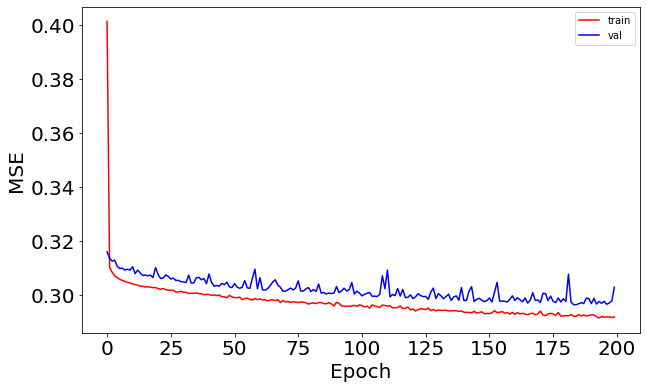

In [35]:
# Graficar el mse
model_history = model_search.fit(X_train,y_train,
                    epochs=epochs,
                    batch_size=200,
                    validation_data=(X_test,y_test))


fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

Al parecer gráficamente nuestro modelo no se ve malo, se ve sin picos, mas estable y mi train del test estan un poco pegadas pero juzgando las métricas de performance es un mal modelo.

#### ventajas de la red neuronal
- Capacidad de trabajar con información incompleta
- tolerante a fallas
- Tiene capacidad de aprender por si misma y generar resultados que no se limitan a la información que se les dio al principio.

#### desventajas de la red neuronal
- Si hay demasiados datos, la red neuronal requiere procesadores con gran poder de procesamiento.
- Son muy tardadas

### COMPARAR MODELOS

In [38]:
data_compar_cross = {'Modelo': ['LR', 'RF','Tree', 'NN'], 'MSE': [ mse_lr, mse_rf, mse_tree, mse_nn],
                    'MAE':[mae_lr, mae_rf, mae_tree, mae_nn],
                    'R2':[r2_lr, r2_rf, r2_tree, r2_nn]} 
data_compar_cross = pd.DataFrame(data_compar_cross)
data_compar_cross

,Modelo,MSE,MAE,R2
0,LR,0.099607,0.244023,0.380048
1,RF,0.046986,0.159723,0.707563
2,Tree,0.060290,0.178593,0.624759
3,NN,0.086366,0.221782,0.462462


Ahora con esta tablita comparando los 4 podemos notar que el mejor es Random Forest, tiene la mayor R^2 y su MSE y MAE se encuentran bajos, el peor modelo resultó ser Regresión lineal con una R^2 bajísima de 0.03800 vs 0.7175 de mi Random forest

## Random forest mejor modelo

## Predecir datos nuevos

In [39]:
X_new= pd.DataFrame([[54876.62,674.28,44638.81,58.33,9505.58,9408.07,97.49,0.0,0.0]],columns=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type_encoder'])
X_new

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type_encoder
0,54876.62,674.28,44638.81,58.33,9505.58,9408.07,97.49,0.0,0.0


Hacemos un nuevo df con la segunda fila de mi data set sin escalar para visualizar mejor si mi prediccion fue correcta ya que conocemos nuestra variable respuesta.

In [ ]:
#predicciones con datos escalados
X_new_scaled = sc.fit_transform(X_new)
ynew = new_model_RF.predict(X_new_scaled)

Se realiza la predicción

In [ ]:
print('El precio promedio sería', ynew, 'VS el precio real es', datanew['AveragePrice'][1])

Nuestra predicción se acerca a nuestro valor real.
    El precio por aguacate individual que predijo mi modelo es 0.8932 dolares y el real de 1.35 dolares